In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [16]:
img=cv2.imread('coco.jpg')

In [17]:
cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
b,g,r=cv2.split(img)

In [19]:
rgbimg=cv2.merge([b,g,r])

In [20]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh =cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [21]:
#NOISE REMOVAL
kernel=np.ones((2,2),np.uint8)

In [22]:
#opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
closing=cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel,iterations=2)

In [23]:
#sure background area
sure_bg=cv2.dilate(closing,kernel,iterations=3)

In [24]:
#finding foreground region
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

In [25]:
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [26]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

In [27]:
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

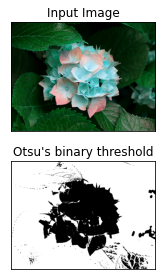

In [28]:
plt.subplot(211),plt.imshow(rgbimg)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()